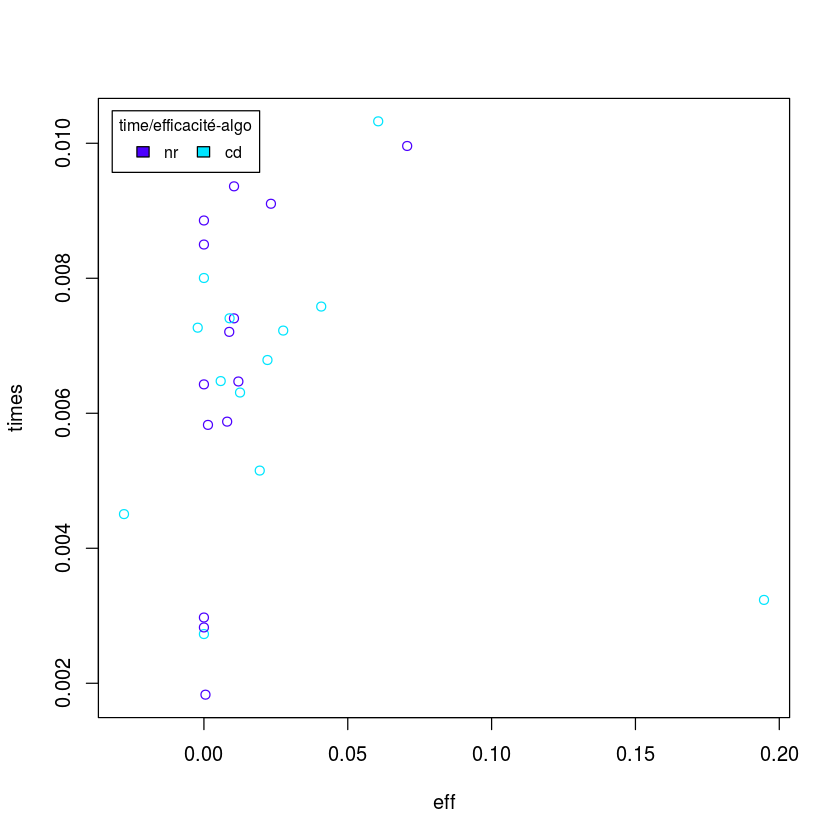

In [1]:
datas <- read.csv("results/estimation.csv",sep = ",",h=F, col.names = c('dim','algo','time','efficacity'))
times <- datas$time
eff <- datas$efficacity
plot(eff,times,col =topo.colors(2))
legend("topleft", inset=.02, title="time/efficacité-algo",c("nr","cd"), fill=topo.colors(2), horiz=TRUE, cex=0.8,)

In [2]:
datas

dim,algo,time,efficacity
10,nr,0.007405996,0.0104421324
10,nr,0.007225037,0.0275608187
10,nr,0.008499861,0.0000000000
10,nr,0.008003950,NaN
10,nr,0.006470919,0.0119763223
10,nr,0.007267952,-0.0021575827
10,nr,0.007205963,0.0088023442
10,nr,0.008003950,0.0000000000
10,nr,0.006428003,0.0000000000
10,nr,0.006568909,NaN


In [3]:
sigmas <- cov(datas)
AR <- AR1(10)  #récupérer graph


################# Des valeurs de lamda = sigma inverse #################

siginv <- sigmas # solve(sigmas)  #
lamda2 <- c(siginv[ upper.tri(siginv,diag = TRUE) ],0.001)
lamda2 <- abs(lamda2)  #lamda[lamda >0]
lamda2 <- sort(lamda2,decreasing = TRUE)
#lamda <- round(lamda,digits = 7)
d = length(lamda2)
theta2 <- array(0, dim=c(10,10,d))


TP2 <- sample(0,d,replace = TRUE)
FP2 <- rep(0,d)
TN2 <- rep(0,d)
FN2 <- rep(0,d)
j=1
for(i in lamda2){
  thetaChap2 <- glasso(sigmas,rho =i)
  theta2[,,j] <-thetaChap2$wi
  TP2[j] <- sum((theta2[,,j] != 0) & (AR != 0))
  TN2[j] <- sum((theta2[,,j] == 0) & (AR == 0))
  FP2[j] <- sum((theta2[,,j] != 0) & (AR == 0))
  FN2[j] <- sum((theta2[,,j] == 0) & (AR != 0))
  j=j+1
}

ord2 <- order(TP2)
TPR2 = TP2/(TP2+FN2)
TPR2 <- TPR2[ord2]
FPR2 = FP2/(TN2+FP2)
FPR2 <- FPR2[ord2]

AUC2 <- sum(diff(FPR2) * (TPR2[-1] + TPR2[-length(TPR2)]))/2


plot( FPR2,TPR2, type = "b",main = "ROC Curve", xlab = "False Postive Rate:1-specificity", 
      ylab = "True Postive Rate:sensitivity",col="red")



#plot( FPR,TPR,type = "b", main = "ROC Curve", xlab = "False Postive Rate:1-specificity", 
 #     ylab = "True Postive Rate:sensitivity",col="blue")

#lines( FPR2,TPR2,pch=18, main = "ROC Curve", xlab = "False Postive Rate:1-specificity", 
      # ylab = "True Postive Rate:sensitivity",col="red")
legend(0.6, 0.7, legend=c("lamda lineaire: ", "lamda = theta"),col = c("blue","red"), lty=1:2, cex=0.8)


#AUC1 > AUC2 # if true ,lamda lineaire(bleue) mieux  q lamda=theta(rouge)


ERROR: Error: is.numeric(x) || is.logical(x) is not TRUE
